In [ ]:
pwd

In [2]:
import numpy as np
import pandas as pd
import pickle

from matplotlib import pyplot as plt
import seaborn as sns

import os
import ants
from tqdm import tqdm

import umap

In [3]:
df = pd.read_csv('../Data/ABIDE_legend_S982.csv')
patients = df['DxGroup'].values==1
df_asd = df.iloc[patients]
df

,Unnamed: 0,index,BIDS_ID,Anonymized ID,Subject Type,Visit,Days since enrollment,SubID,DxGroup,DSMIVTR,...,WISC4 Sym Scaled,Age at MPRAGE,Current Med Status,Medication Name,Medication Name.1,Off stimulants at EPI scan?,ScanSite,ScannerType,ScannerID,ScanSiteID
0,0,0,sub-001,A00033348,PATIENT,session_1,8,51320,1,2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
1,1,1,sub-002,A00033398,CONTROL,session_1,8,51373,2,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
2,2,2,sub-003,A00033352,PATIENT,session_1,8,51324,1,2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
3,3,3,sub-004,A00033389,CONTROL,session_1,8,51364,2,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
4,4,4,sub-005,A00033354,PATIENT,session_1,8,51326,1,2.0,...,NaN,NaN,0.0,NaN,NaN,NaN,mpg,verio,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,977,1094,sub-985,A00032725,CONTROL,session_1,28,51252,2,0.0,...,NaN,10.99,0.0,NaN,NaN,NaN,ucla,triotim,6,12
978,978,1095,sub-986,A00032704,PATIENT,session_1,28,51229,1,1.0,...,NaN,14.59,0.0,NaN,NaN,NaN,ucla,triotim,6,12
979,979,1096,sub-987,A00032740,CONTROL,session_1,28,51268,2,0.0,...,NaN,17.78,0.0,NaN,NaN,NaN,ucla,triotim,6,12
980,980,1098,sub-989,A00032686,PATIENT,session_1,28,51210,1,1.0,...,NaN,16.56,0.0,NaN,NaN,NaN,ucla,triotim,6,12


In [4]:
data_latent_vec = np.load('../Data/latent_vecs.npz')
keys = list(data_latent_vec.keys())
print(keys)
for key in keys:
    print(data_latent_vec[key].shape)

['salient_vec_abide', 'background_vec_abide', 'vae_vec_abide', 'salient_vec_sfari', 'background_vec_sfari', 'vae_vec_sfari']
(10, 982, 16)
(10, 982, 16)
(10, 982, 32)
(10, 121, 16)
(10, 121, 16)
(10, 121, 32)


In [5]:
%%time
embed = pickle.load(open('../Data/embedded_data.pickle','rb'))

CPU times: user 872 µs, sys: 492 µs, total: 1.36 ms
Wall time: 3.14 ms


In [6]:
keys = list(embed.keys())
for key in keys:
    try:
        print(f'{key} | {embed[key].shape}')
    except:
        pass

embedding_bg | (470, 16)
embedding_sl | (470, 16)
embedding_vae | (470, 32)
sfari_embedding_vae | (51, 32)
sfari_embedding_bg | (51, 16)
sfari_embedding_sl | (51, 16)
bg_space_abide | (470, 2)
sl_space_abide | (470, 2)
vae_space_abide | (470, 2)
bg_space_sfari | (51, 2)
sl_space_sfari | (51, 2)
vae_space_sfari | (51, 2)
bg_Sspace_sfari | (51, 2)
sl_Sspace_sfari | (51, 2)
vae_Sspace_sfari | (51, 2)


In [7]:
# m1 = data_latent_vec['salient_vec_abide'][0,patients,:]
# m2 = embed['embedding_sl']

In [8]:
ages = df_asd['AgeAtScan'].values
ag1 = ages<12
ag2 = (ages>12)*(ages<16)
ag3 = (ages>16)*(ages<22)
ag4 = ages>22
[f'N={group.sum()}' for group in [ag1,ag2,ag3,ag4]]

['N=127', 'N=122', 'N=109', 'N=99']

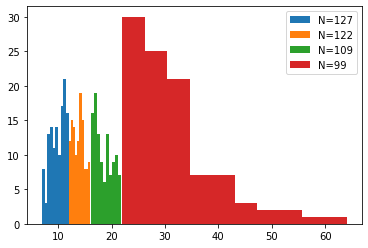

In [9]:
#plt.hist(ages,alpha=.3)
plt.hist(ages[ag1]);
plt.hist(ages[ag2]);
plt.hist(ages[ag3]);
plt.hist(ages[ag4]);
plt.legend([f'N={group.sum()}' for group in [ag1,ag2,ag3,ag4]])

In [10]:
n_components = 1
n_neighbors = 5
map_ag1 = umap.UMAP(n_components=n_components,n_neighbors=n_neighbors, random_state=42).fit(embed['embedding_sl'][ag1,:])
map_ag2 = umap.UMAP(n_components=n_components,n_neighbors=n_neighbors, random_state=42).fit(embed['embedding_sl'][ag2,:])
map_ag3 = umap.UMAP(n_components=n_components,n_neighbors=n_neighbors, random_state=42).fit(embed['embedding_sl'][ag3,:])
map_ag4 = umap.UMAP(n_components=n_components,n_neighbors=n_neighbors, random_state=42).fit(embed['embedding_sl'][ag4,:])

In [11]:
mats = [map_ag1,map_ag2,map_ag3,map_ag4]

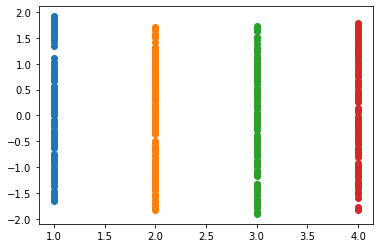

In [12]:
import scipy
for idx,mat in enumerate(mats):
    #plt.scatter(np.zeros(mat.embedding_.shape)+idx+1,mat.embedding_-mat.embedding_.mean()) 
    plt.scatter(np.zeros(mat.embedding_.shape)+idx+1,scipy.stats.zscore(mat.embedding_)) 

In [152]:
from nilearn.glm import threshold_stats_img
from nilearn.glm.second_level import SecondLevelModel
from nilearn import plotting

template = ants.image_read('../Data/Atlas_brain_2mm.nii')
gm = ants.image_read('../Data/c1Atlas_brain_2mm.nii')
wm = ants.image_read('../Data/c2Atlas_brain_2mm.nii')
brain_mask = gm+wm 


template = template.resample_image(resample_params=(64,64,64), use_voxels=True, interp_type=4)
brain_mask = brain_mask.resample_image(resample_params=(64,64,64), use_voxels=True, interp_type=4)
bg_img = template.to_nibabel()

In [175]:
home = os.getenv("HOME")

In [184]:
### Apply brain mask to jacobians

# make normed_Js_masked
if not os.path.exists(os.path.join(home,'jacobians/normed_Js_masked')):
    os.mkdir(os.path.join(home,'jacobians/normed_Js_masked'))

# crop jacobians
j_fn_temp =os.path.join(home,'jacobians/normed_Js/{}_normed_Js.nii')
for sub in tqdm(df_asd['BIDS_ID'].values):
    im = ants.image_read(j_fn_temp.format(sub))
    im[brain_mask<.2]=0
    im.to_filename(os.path.join(home,'jacobians/normed_Js_masked/{}_normed_Js_masked.nii').format(sub))

100%|██████████| 470/470 [00:04<00:00, 101.64it/s]


In [186]:
# Load jacobians
#j_fn_temp =os.path.join(home,'jacobians/normed_Js/{}_normed_Js.nii')
j_fn_temp =os.path.join(home,'jacobians/normed_Js_masked/{}_normed_Js_masked.nii')
Js = dict()
for sub in tqdm(df_asd['BIDS_ID'].values):
    Js[sub] = ants.image_read(j_fn_temp.format(sub))

100%|██████████| 470/470 [00:02<00:00, 159.91it/s]


In [198]:
def glm_second_level(subs_high,subs_low):
    con_name = 't_con'
    files_high = [j_fn_temp.format(sub) for sub in subs_high]
    files_low = [j_fn_temp.format(sub) for sub in subs_low]

    second_level_input = files_high+files_low
    nsubs = int(len(second_level_input)/2)
    condition_effect = np.hstack((np.repeat(1,nsubs),np.repeat(-1,nsubs)))

    unpaired_design_matrix = pd.DataFrame(condition_effect[:, np.newaxis],columns=[con_name])
    second_level_model_unpaired = SecondLevelModel().fit(second_level_input, design_matrix=unpaired_design_matrix)

    stat_maps_unpaired = second_level_model_unpaired.compute_contrast(con_name,output_type='all')
    return stat_maps_unpaired,second_level_model_unpaired

In [188]:
def plot_glass_brain(stat_maps_unpaired,threshold=3.1,con_name='t_con',title=None):
    display = plotting.plot_glass_brain(
    stat_maps_unpaired, threshold=threshold, colorbar=True, plot_abs=False,
    title=title, vmin=0, vmax=6)

In [189]:
h = 20
corner_subs = dict()
corner_subs['ag1'] = dict()
corner_subs['ag2'] = dict()
corner_subs['ag3'] = dict()
corner_subs['ag4'] = dict()

In [190]:
corner_subs['ag1']['low'] = df_asd['BIDS_ID'].values[ag1][np.argsort(map_ag1.embedding_[:,0])[0:h]]
corner_subs['ag1']['high'] = df_asd['BIDS_ID'].values[ag1][np.argsort(map_ag1.embedding_[:,0])[-h::]]

corner_subs['ag2']['low'] = df_asd['BIDS_ID'].values[ag2][np.argsort(map_ag2.embedding_[:,0])[0:h]]
corner_subs['ag2']['high'] = df_asd['BIDS_ID'].values[ag2][np.argsort(map_ag2.embedding_[:,0])[-h::]]

corner_subs['ag3']['low'] = df_asd['BIDS_ID'].values[ag3][np.argsort(map_ag3.embedding_[:,0])[0:h]]
corner_subs['ag3']['high'] = df_asd['BIDS_ID'].values[ag3][np.argsort(map_ag3.embedding_[:,0])[-h::]]

corner_subs['ag4']['low'] = df_asd['BIDS_ID'].values[ag4][np.argsort(map_ag4.embedding_[:,0])[0:h]]
corner_subs['ag4']['high'] = df_asd['BIDS_ID'].values[ag4][np.argsort(map_ag4.embedding_[:,0])[-h::]]

In [221]:
for key in list(corner_subs.keys()):
    pd.DataFrame.from_dict(corner_subs[key]).to_csv(f'../CSVs/corner_{key}.csv')

In [191]:
# check that no overlap
flat = np.array([corner_subs[key]['high']+corner_subs[key]['low'] for key in corner_subs.keys()]).flatten()
assert len(np.unique(flat))==len(flat),'whoops'

In [199]:
%%time
stat_maps_ag1,model_ag1 = glm_second_level(corner_subs['ag1']['high'],corner_subs['ag1']['low'])
stat_maps_ag2,model_ag2 = glm_second_level(corner_subs['ag2']['high'],corner_subs['ag2']['low'])
stat_maps_ag3,model_ag3 = glm_second_level(corner_subs['ag3']['high'],corner_subs['ag3']['low'])
stat_maps_ag4,model_ag4 = glm_second_level(corner_subs['ag4']['high'],corner_subs['ag4']['low'])

CPU times: user 45 s, sys: 16.7 s, total: 1min 1s
Wall time: 42 s


/data/aglinska/anaconda3/lib/python3.8/site-packages/scipy/ndimage/measurements.py:303: DeprecationWarning:

In future, it will be an error for 'np.bool_' scalars to be interpreted as an index



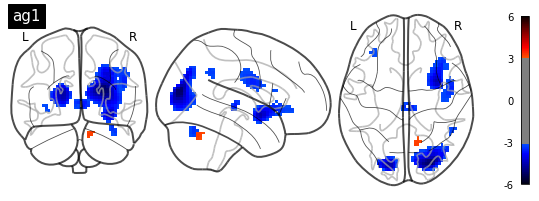

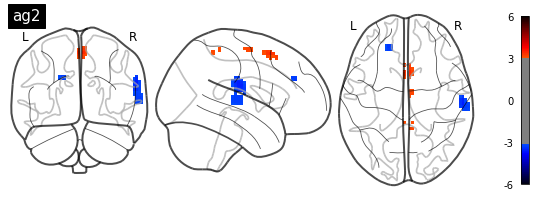

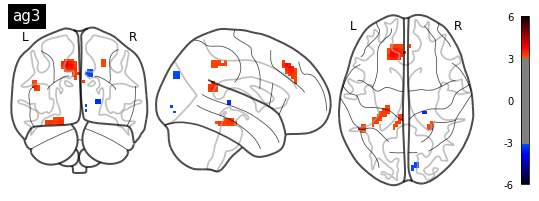

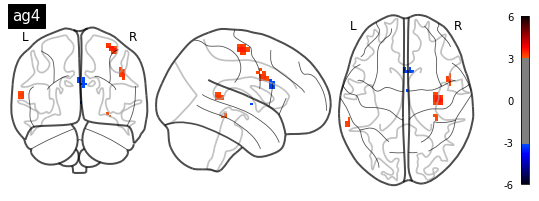

In [193]:
plot_glass_brain(stat_maps_ag1['z_score'],title='ag1')
plot_glass_brain(stat_maps_ag2['z_score'],title='ag2')
plot_glass_brain(stat_maps_ag3['z_score'],title='ag3')
plot_glass_brain(stat_maps_ag4['z_score'],title='ag4')

In [196]:
from nilearn.reporting import make_glm_report

In [209]:
# make_glm_report(model=model_ag1,contrasts=['t_con'],bg_img=bg_img).save_as_html(home+'/test1.html')
# make_glm_report(model=model_ag2,contrasts=['t_con'],bg_img=bg_img).save_as_html(home+'/test2.html')
# make_glm_report(model=model_ag3,contrasts=['t_con'],bg_img=bg_img).save_as_html(home+'/test3.html')
# make_glm_report(model=model_ag4,contrasts=['t_con'],bg_img=bg_img).save_as_html(home+'/test4.html')

In [211]:
#!zip -q -r ~/jacobians/normed_Js_masked.zip ~/jacobians/normed_Js_masked/